# CATBOOST VS ROVA

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor

# CATBOOST

In [322]:
data = pd.read_csv('Data/TFM_Hdataset_Gtrends.csv', index_col=0)
data

,Description,Seasonality,Year,Week,Channel,WSSI Category,LIMITED EDITION STYLES,Originals,Source,sales,...,Price,Discount,Margin,RRP,Markdown,Cost,month,Channel2,CategoryCluster,ProductCluster
0,Astrid,OLD,2017,1,DE Direct,Womens Active Shoes,0.0,0.0,NONE,1.0,...,38.526679,0.000000,25.758448,50.378410,11.851731,12.768232,1,US,Cluster 6,Cluster 2
1,Charmaine,SS,2017,1,DE Direct,Womens Formal Shoes,0.0,0.0,NONE,1.0,...,58.225767,0.000000,44.100962,58.395499,0.169733,14.124805,1,US,Cluster 0,Cluster 2
2,Chile,SS,2017,1,DE Direct,Womens Casual Shoes,0.0,0.0,NONE,1.0,...,58.225767,0.000000,46.649675,58.395499,0.169733,11.576091,1,US,Cluster 3,Cluster 7
3,Devotion,AW,2017,1,DE Direct,Womens Slippers,0.0,0.0,NONE,2.0,...,26.457288,0.000000,17.882101,34.688819,8.231530,8.575187,1,US,Cluster 0,Cluster 2
4,Donna,CONT,2017,1,DE Direct,Womens Formal Shoes,0.0,0.0,NONE,1.0,...,69.982735,0.000000,54.114939,70.192570,0.209836,15.867796,1,US,Cluster 0,Cluster 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324424,Waltham,AW,2021,50,Wholesale,Womens Casual Boots,0.0,0.0,MANUFACTURED,20.0,...,52.500000,0.000000,29.532000,87.500000,35.000000,22.968000,12,UK,Cluster 4,Cluster 6
324425,Whisper,AW,2021,50,Wholesale,Womens Casual Boots,0.0,0.0,MANUFACTURED,74.0,...,45.586351,0.000000,25.807703,70.833333,25.246982,19.778649,12,UK,Cluster 4,Cluster 4
324426,Whisper,CONT,2021,50,Wholesale,Womens Casual Boots,0.0,0.0,MANUFACTURED,83.0,...,54.996024,0.046867,35.907952,70.833333,15.790441,19.088072,12,UK,Cluster 4,Cluster 4
324427,Wrap,AW,2021,50,Wholesale,Womens Slippers,0.0,0.0,MANUFACTURED,28.0,...,29.170000,0.000000,14.480000,49.166666,19.996666,14.690000,12,UK,Cluster 0,Cluster 2


In [323]:
data['Date'] = pd.to_datetime(data['Date'])

conditions = [(data['Year']!= 2019) & (data['Year']!= 2021),
              (data['Year']== 2019),
              (data['Year']!= 2019)]

vals = [np.sin(2*np.pi*data['Week']/52),
        np.sin(2*np.pi*data['Week']/53),
        np.sin(2*np.pi*data['Week']/50)
       ]

vals2 = [np.cos(2*np.pi*data['Week']/52),
        np.cos(2*np.pi*data['Week']/53),
        np.cos(2*np.pi*data['Week']/50)
       ]
data['Week_sin'] = np.select(conditions,vals)
data['Week_cos'] = np.select(conditions,vals2)

In [325]:
rova = pd.read_csv('Data/GT_GTX_results.csv')
rova['Observation'] = pd.to_datetime(rova['Observation'])
rova = rova.rename(columns={'Observation':'Date'})

In [326]:
rova.groupby('Date').sum()

,Unnamed: 0,Sales,discount,price,RRP_U,cost_u,MARKDOWN_U,goretex,Holy Saturday,Boxing Day,...,Forecast Residual(Mixed Effects)|MULTMDV,Worst Case Scenario|MULTMDV,Promotions|none|MULTMDV,Pricing|none|MULTMDV,Holidays|none|MULTMDV,GTrends|none|MULTMDV,Market Proxy|none|MULTMDV,Others|none|MULTMDV,Quality|none|MULTMDV,PrevSales|none|MULTMDV
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-08,153510,741.0,6.967270,891.521167,1356.179908,372.073513,389.627490,2736.0,0,0,...,-181.837108,-323.167072,344.144686,-57.286444,-215.290258,1167.436167,0.000000,0.0,0.0,0.0
2017-01-15,153545,578.0,10.170833,835.976649,1422.144188,395.240697,424.157317,2052.0,0,0,...,-357.690896,-323.167004,364.963534,-55.953768,0.000000,936.848135,0.000000,0.0,0.0,0.0
2017-01-22,153580,842.0,9.153175,909.333773,1259.010987,338.990568,243.092156,2365.0,0,0,...,26.506495,-332.900876,375.665885,-47.009138,0.000000,816.737633,0.000000,0.0,0.0,0.0
2017-01-29,153615,852.0,7.962500,862.239514,1276.950364,346.640226,339.288785,1881.0,0,0,...,-2.772337,-332.900849,387.014736,-54.986469,0.000000,820.248251,31.396658,0.0,0.0,0.0
2017-02-05,153650,1305.0,8.066667,750.669011,1069.230302,289.269276,162.295625,1666.0,0,0,...,536.378078,-332.900848,384.359036,-41.755319,0.000000,709.133870,47.785217,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-21,162365,1464.0,4.730403,429.860477,813.771375,207.343636,301.189213,3871.0,0,0,...,-496.257175,-1236.623580,496.371221,-95.032831,0.000000,2421.374600,373.167830,0.0,0.0,0.0
2021-11-28,162400,1020.0,3.486508,423.850989,749.237634,185.154907,286.769400,3388.0,0,0,...,-1249.541619,-1236.623639,455.695306,-98.450128,0.000000,2886.687325,368.622886,0.0,0.0,0.0
2021-12-05,162435,2223.0,3.624786,339.054542,619.779820,159.829521,257.967169,3388.0,0,0,...,119.797337,-1236.623726,493.897164,-93.871425,0.000000,2697.327826,350.863100,0.0,0.0,0.0


In [327]:
data = data[['Description', 'Seasonality', 'Year', 'Week_sin','Week_cos', 'Channel',
       'WSSI Category', 'Originals', 'Source',
       'gender', 'style', 'prev_sales2', 'prev_sales3',
       'prev_sales4', 'Price', 'Discount', 
       'RRP', 'Markdown', 'Cost', 'CategoryCluster','Date',
       'ProductCluster','sales']]

import warnings
warnings.filterwarnings("ignore")

In [328]:
def catb(data_s):
    
    categorical_features_indices = np.where(data_s.dtypes != np.float64)[0]
    
    X = data_s[(data_d['Date']<'01-01-2021')].values
    T = data_s[(data_d['Date']>='01-01-2021')].values 

    X_train,y_train = X[:,:-1], X[:,-1]
    X_test,y_test = T[:,:-1], T[:,-1] 

    mod_cb = CatBoostRegressor(iterations=60, depth=11, learning_rate=0.1, od_type= "Iter", loss_function='RMSE')
    mod_cb = mod_cb.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)
    y_hat = mod_cb.predict(X_test)
    y_hat_m = mod_cb.predict(X_train)
    
    score = r2_score(y_test,y_hat)
    score2 = mean_squared_error(y_test,y_hat)
    score3 = mean_absolute_error(y_test,y_hat)
    
    score_m = r2_score(y_train,y_hat_m)
    score2_m = mean_squared_error(y_train,y_hat_m)
    score3_m = mean_absolute_error(y_train,y_hat_m)

    return y_hat, score, score2, score3, y_hat_m, score_m, score2_m, score3_m



Cluster 6


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 90.5415377	test: 75.2454785	best: 75.2454785 (0)	total: 85ms	remaining: 5.01s
1:	learn: 86.9624932	test: 73.5554053	best: 73.5554053 (1)	total: 167ms	remaining: 4.85s
2:	learn: 83.6606506	test: 71.1665478	best: 71.1665478 (2)	total: 240ms	remaining: 4.56s
3:	learn: 80.8479600	test: 69.4417014	best: 69.4417014 (3)	total: 320ms	remaining: 4.48s
4:	learn: 78.2572321	test: 68.2930468	best: 68.2930468 (4)	total: 402ms	remaining: 4.43s
5:	learn: 75.8885206	test: 66.7969614	best: 66.7969614 (5)	total: 495ms	remaining: 4.45s
6:	learn: 73.9605737	test: 65.4742981	best: 65.4742981 (6)	total: 585ms	remaining: 4.43s
7:	learn: 72.1481176	test: 64.0079660	best: 64.0079660 (7)	total: 665ms	remaining: 4.32s
8:	learn: 70.6335229	test: 62.8231859	best: 62.8231859 (8)	total: 739ms	remaining: 4.19s
9:	learn: 68.7204255	test: 62.6697054	best: 62.6697054 (9)	total: 818ms	remaining: 4.09s
10:	learn: 67.1858384	test: 62.6016855	best: 62.6016855 (10)	total: 906ms	remaining: 4.04s
11:	learn: 65.501194

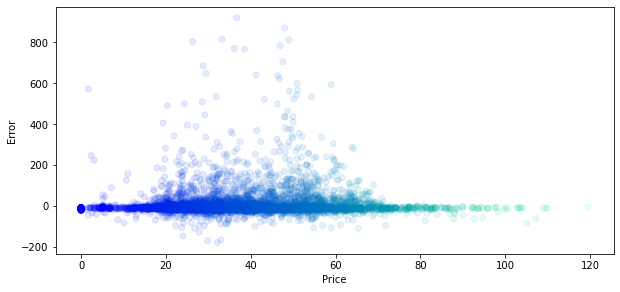

Sales vs error


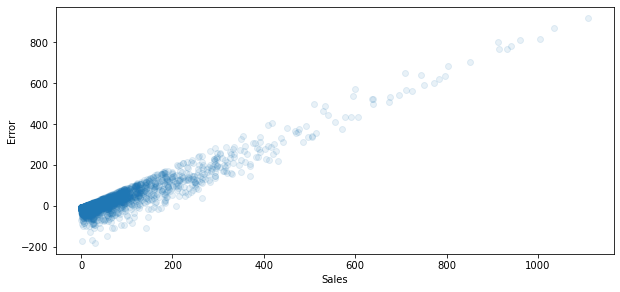

Cluster 0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 68.6677727	test: 57.4833468	best: 57.4833468 (0)	total: 141ms	remaining: 8.31s
1:	learn: 65.9280446	test: 57.0048368	best: 57.0048368 (1)	total: 280ms	remaining: 8.11s
2:	learn: 63.5706591	test: 55.8362371	best: 55.8362371 (2)	total: 437ms	remaining: 8.3s
3:	learn: 61.3922445	test: 54.9894434	best: 54.9894434 (3)	total: 574ms	remaining: 8.04s
4:	learn: 59.5548016	test: 54.0232722	best: 54.0232722 (4)	total: 707ms	remaining: 7.78s
5:	learn: 57.8697252	test: 52.7952164	best: 52.7952164 (5)	total: 847ms	remaining: 7.62s
6:	learn: 56.2598435	test: 52.3745650	best: 52.3745650 (6)	total: 997ms	remaining: 7.54s
7:	learn: 54.8917257	test: 51.2754917	best: 51.2754917 (7)	total: 1.14s	remaining: 7.42s
8:	learn: 53.6320520	test: 51.0205957	best: 51.0205957 (8)	total: 1.29s	remaining: 7.32s
9:	learn: 52.4036516	test: 50.2324345	best: 50.2324345 (9)	total: 1.45s	remaining: 7.25s
10:	learn: 51.5139887	test: 49.8356670	best: 49.8356670 (10)	total: 1.57s	remaining: 7s
11:	learn: 50.6045797	t

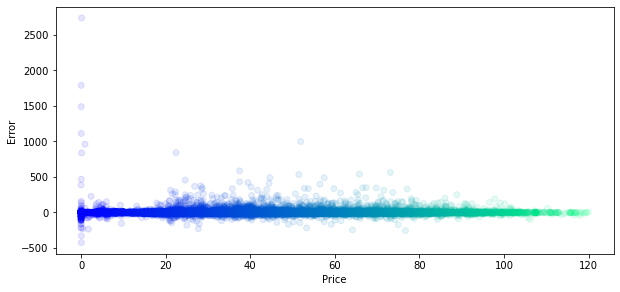

Sales vs error


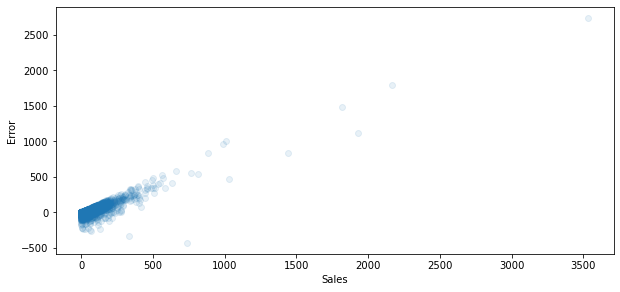

Cluster 3


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 106.0296156	test: 71.0851624	best: 71.0851624 (0)	total: 97.2ms	remaining: 5.73s
1:	learn: 101.0973837	test: 67.5240413	best: 67.5240413 (1)	total: 182ms	remaining: 5.27s
2:	learn: 96.8706625	test: 64.8204699	best: 64.8204699 (2)	total: 272ms	remaining: 5.17s
3:	learn: 93.1683217	test: 62.7675648	best: 62.7675648 (3)	total: 367ms	remaining: 5.13s
4:	learn: 89.7658737	test: 60.9581189	best: 60.9581189 (4)	total: 448ms	remaining: 4.93s
5:	learn: 86.6858405	test: 59.5280880	best: 59.5280880 (5)	total: 534ms	remaining: 4.81s
6:	learn: 83.7736324	test: 58.2733230	best: 58.2733230 (6)	total: 630ms	remaining: 4.77s
7:	learn: 81.3683315	test: 57.1603182	best: 57.1603182 (7)	total: 727ms	remaining: 4.73s
8:	learn: 79.0630946	test: 56.7809942	best: 56.7809942 (8)	total: 815ms	remaining: 4.62s
9:	learn: 76.9334508	test: 56.5864211	best: 56.5864211 (9)	total: 912ms	remaining: 4.56s
10:	learn: 75.1777893	test: 55.9911760	best: 55.9911760 (10)	total: 1.01s	remaining: 4.49s
11:	learn: 73.49

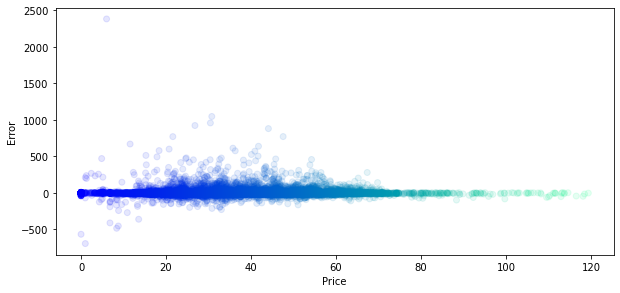

Sales vs error


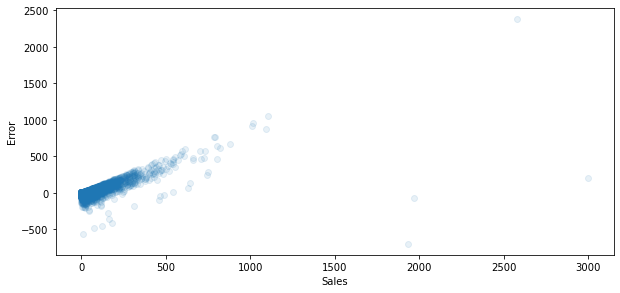

Cluster 2


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 133.7561132	test: 62.0495305	best: 62.0495305 (0)	total: 76.3ms	remaining: 4.5s
1:	learn: 126.6236821	test: 60.0666088	best: 60.0666088 (1)	total: 147ms	remaining: 4.25s
2:	learn: 120.4832640	test: 58.3235497	best: 58.3235497 (2)	total: 238ms	remaining: 4.52s
3:	learn: 114.9712284	test: 56.9035727	best: 56.9035727 (3)	total: 314ms	remaining: 4.4s
4:	learn: 110.0014684	test: 56.0508374	best: 56.0508374 (4)	total: 399ms	remaining: 4.38s
5:	learn: 105.6988776	test: 55.0528531	best: 55.0528531 (5)	total: 480ms	remaining: 4.32s
6:	learn: 101.8293545	test: 54.2384184	best: 54.2384184 (6)	total: 556ms	remaining: 4.21s
7:	learn: 97.9974183	test: 53.4256025	best: 53.4256025 (7)	total: 639ms	remaining: 4.16s
8:	learn: 94.7216583	test: 52.8776694	best: 52.8776694 (8)	total: 716ms	remaining: 4.06s
9:	learn: 91.8484223	test: 52.4614258	best: 52.4614258 (9)	total: 791ms	remaining: 3.96s
10:	learn: 89.1378904	test: 52.1780460	best: 52.1780460 (10)	total: 870ms	remaining: 3.88s
11:	learn: 86

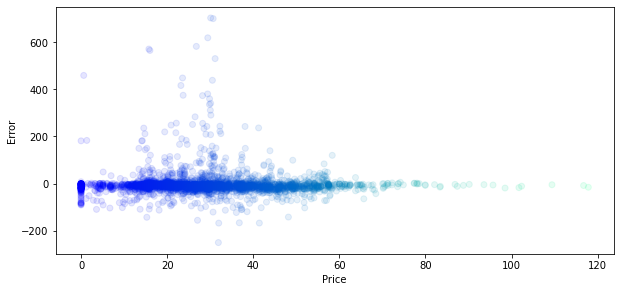

Sales vs error


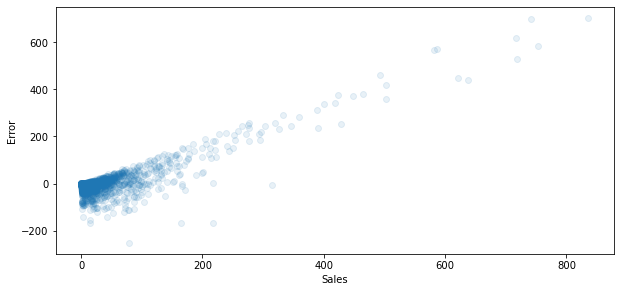

Cluster 5


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 125.8488080	test: 75.7813629	best: 75.7813629 (0)	total: 86.9ms	remaining: 5.13s
1:	learn: 119.7986369	test: 72.5110283	best: 72.5110283 (1)	total: 158ms	remaining: 4.57s
2:	learn: 114.2971333	test: 69.8123070	best: 69.8123070 (2)	total: 233ms	remaining: 4.42s
3:	learn: 109.3965461	test: 67.6513736	best: 67.6513736 (3)	total: 306ms	remaining: 4.29s
4:	learn: 105.1250487	test: 65.9111378	best: 65.9111378 (4)	total: 384ms	remaining: 4.23s
5:	learn: 101.3759349	test: 64.3885826	best: 64.3885826 (5)	total: 464ms	remaining: 4.17s
6:	learn: 97.9696989	test: 62.9215506	best: 62.9215506 (6)	total: 547ms	remaining: 4.14s
7:	learn: 95.0448456	test: 61.9136486	best: 61.9136486 (7)	total: 636ms	remaining: 4.13s
8:	learn: 92.4393475	test: 61.1963621	best: 61.1963621 (8)	total: 718ms	remaining: 4.07s
9:	learn: 90.2767960	test: 60.2398004	best: 60.2398004 (9)	total: 798ms	remaining: 3.99s
10:	learn: 88.0520571	test: 59.6575747	best: 59.6575747 (10)	total: 878ms	remaining: 3.91s
11:	learn: 8

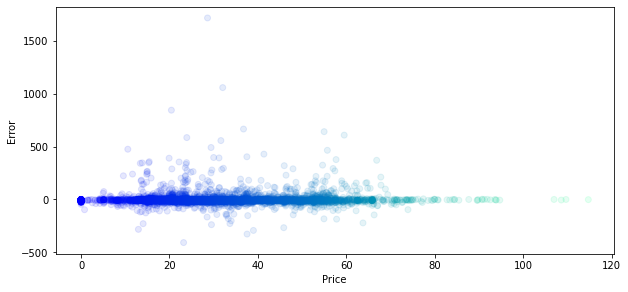

Sales vs error


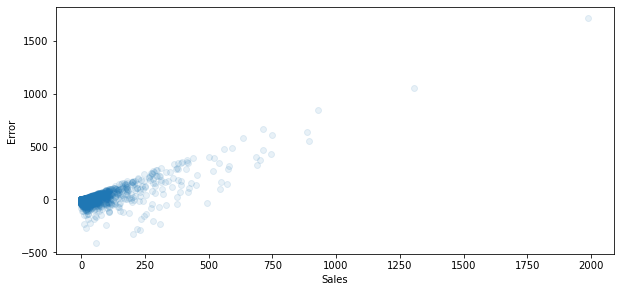

Cluster 4


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 154.9580900	test: 80.0133181	best: 80.0133181 (0)	total: 82.8ms	remaining: 4.89s
1:	learn: 146.3900674	test: 77.4167434	best: 77.4167434 (1)	total: 164ms	remaining: 4.77s
2:	learn: 138.6468560	test: 74.9952651	best: 74.9952651 (2)	total: 237ms	remaining: 4.5s
3:	learn: 131.4645491	test: 72.7346069	best: 72.7346069 (3)	total: 315ms	remaining: 4.41s
4:	learn: 125.2888848	test: 70.6466246	best: 70.6466246 (4)	total: 400ms	remaining: 4.4s
5:	learn: 119.9083765	test: 68.9253525	best: 68.9253525 (5)	total: 481ms	remaining: 4.33s
6:	learn: 115.0492971	test: 67.2338207	best: 67.2338207 (6)	total: 564ms	remaining: 4.27s
7:	learn: 110.4324604	test: 66.1822485	best: 66.1822485 (7)	total: 658ms	remaining: 4.28s
8:	learn: 106.5195534	test: 65.1664513	best: 65.1664513 (8)	total: 736ms	remaining: 4.17s
9:	learn: 102.9640434	test: 64.6555288	best: 64.6555288 (9)	total: 822ms	remaining: 4.11s
10:	learn: 99.9566501	test: 63.8324588	best: 63.8324588 (10)	total: 900ms	remaining: 4.01s
11:	learn:

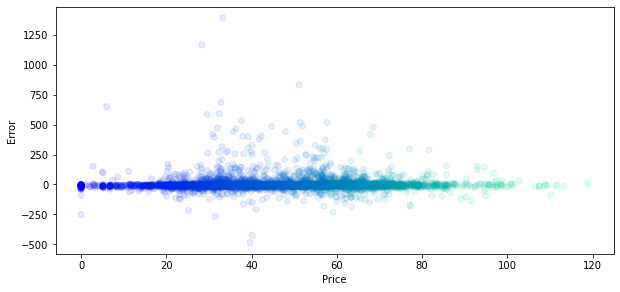

Sales vs error


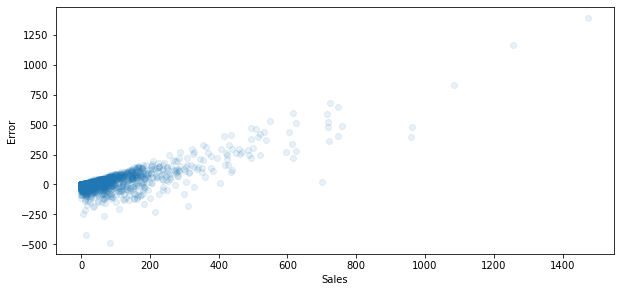

Cluster 1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 207.5761435	test: 74.0705544	best: 74.0705544 (0)	total: 84.2ms	remaining: 4.96s
1:	learn: 190.8220054	test: 68.4865042	best: 68.4865042 (1)	total: 161ms	remaining: 4.66s
2:	learn: 176.3183321	test: 63.7324489	best: 63.7324489 (2)	total: 233ms	remaining: 4.42s
3:	learn: 163.3507178	test: 59.3626597	best: 59.3626597 (3)	total: 311ms	remaining: 4.35s
4:	learn: 151.7422547	test: 55.7001888	best: 55.7001888 (4)	total: 404ms	remaining: 4.44s
5:	learn: 140.9381341	test: 52.3650242	best: 52.3650242 (5)	total: 494ms	remaining: 4.45s
6:	learn: 131.4276940	test: 49.2211920	best: 49.2211920 (6)	total: 585ms	remaining: 4.43s
7:	learn: 122.9364796	test: 46.8936237	best: 46.8936237 (7)	total: 668ms	remaining: 4.34s
8:	learn: 115.6713298	test: 45.1158561	best: 45.1158561 (8)	total: 742ms	remaining: 4.2s
9:	learn: 108.9971823	test: 44.0476502	best: 44.0476502 (9)	total: 819ms	remaining: 4.09s
10:	learn: 103.2697906	test: 42.6340672	best: 42.6340672 (10)	total: 899ms	remaining: 4s
11:	learn: 

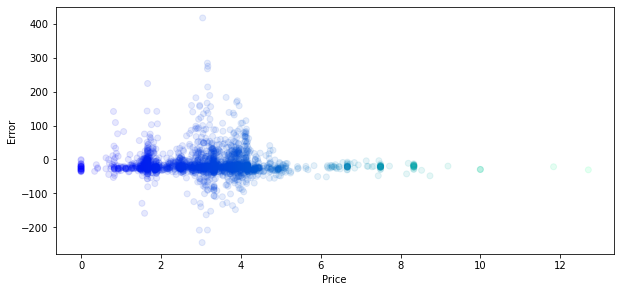

Sales vs error


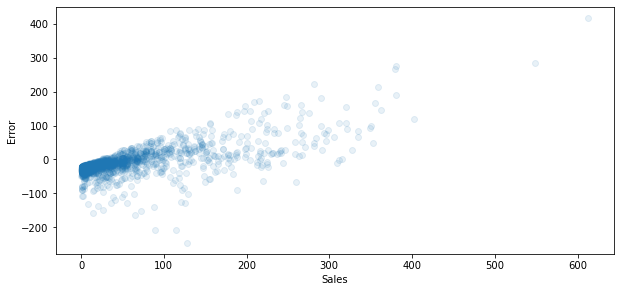

[0.35522967 0.41530695 0.4731957  0.25375398 0.4087667  0.44631641
 0.63438783]


In [329]:
scores = np.zeros((7))
scores2 = np.zeros((7))
scores3 = np.zeros((7))
scores_m = np.zeros((7))
scores2_m = np.zeros((7))
scores3_m = np.zeros((7))
errors = 0
j = 0

for category in data['CategoryCluster'].unique():
    data_d = data.loc[data['CategoryCluster']==category]    
    data_c = data_d.drop(['CategoryCluster','Date'], axis=1)
    
    print(category)
    y_hat, score, score2, score3, y_hat_m, score_m, score2_m, score3_m = catb(data_c)
    
    scores[j] = np.mean(score)
    scores2[j] = np.mean(score2)
    scores3[j] = np.mean(score3)
    scores_m[j] = np.mean(score_m)
    scores2_m[j] = np.mean(score2_m)
    scores3_m[j] = np.mean(score3_m)
    
    data_validation = data_d[(data_d['Date']>='01-01-2021')]
    data_validation['y_hat'] = y_hat
    data_validation['error'] = data_validation['sales'] - data_validation['y_hat']   
    
    data_validation_m = data_d[(data_d['Date']<'01-01-2021')]
    data_validation_m['y_hat_m'] = y_hat_m
    data_validation_m['error_m'] = data_validation_m['sales'] - data_validation_m['y_hat_m']
    
    if j==0:
        df = data_validation
        df['CategoryCluster'] = category
        df_m = data_validation_m
        df_m['CategoryCluster'] = category
    else:
        data_validation['CategoryCluster']=category
        data_validation_m['CategoryCluster']=category
        df = pd.concat([df,data_validation])
        df_m = pd.concat([df_m,data_validation_m])
    
    
    x = data_validation['Price']
    x2 = data_validation['sales']
    y = data_validation['error']
    
    print('Error Plots')
    plt.figure(figsize=(10,10))
    print('Price vs error')
    plt.subplot(211)
    plt.scatter(x,y, c=x, cmap='winter', alpha=0.1)
    plt.xlabel('Price')
    plt.ylabel('Error')
    plt.show()
    plt.figure(figsize=(10,10))
    print('Sales vs error')
    plt.subplot(212)
    plt.scatter(x2,y,  cmap='winter', alpha=0.1)
    plt.xlabel('Sales')
    plt.ylabel('Error')
    plt.show()
    
    j += 1
print(scores) 

0.4306019693108123 2779.444747498659 19.959209139076908 527100009029948.6


<AxesSubplot:xlabel='Date'>

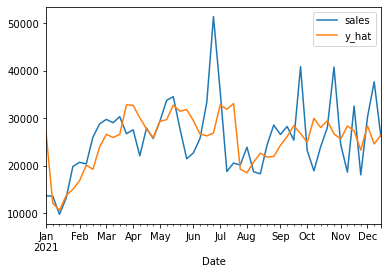

In [332]:
y_test=df['sales']
y_hat=df['y_hat']
score_f = r2_score(y_test,y_hat)
score2_f = mean_squared_error(y_test,y_hat)
score3_f = mean_absolute_error(y_test,y_hat)
score4_f = mean_absolute_percentage_error(y_test,y_hat)
print(score_f,score2_f,score3_f,score4_f)


df[['y_hat','sales','Date']].groupby('Date', as_index=False).sum().plot(x='Date', y=['sales','y_hat'])

In [333]:
mean_result = y_test.mean()*np.ones(len(y_test))
score2_f = mean_squared_error(y_test,mean_result)
score3_f = mean_absolute_error(y_test,mean_result)
score4_f = mean_absolute_percentage_error(y_test,mean_result)
print(score2_f,score3_f,score4_f)

4881.374008502411 30.80920423845295 2427628668620236.0


0.7814875940137075 2793.690206162464 19.844441006804555 265675470812646.75


<AxesSubplot:xlabel='Date'>

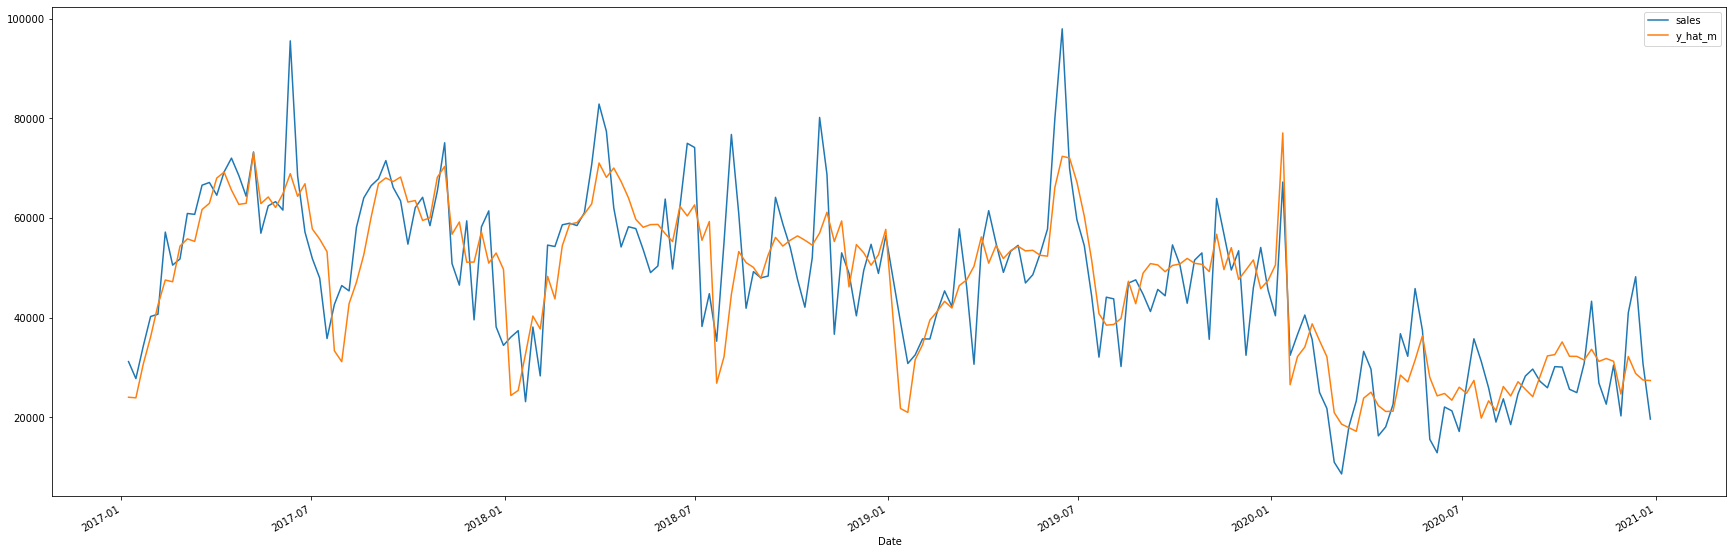

In [334]:
y_test_m=df_m['sales']
y_hat_m=df_m['y_hat_m']
score_fm = r2_score(y_test_m,y_hat_m)
score2_fm = mean_squared_error(y_test_m,y_hat_m)
score3_fm = mean_absolute_error(y_test_m,y_hat_m)
score3_fm = mean_absolute_error(y_test_m,y_hat_m)
score4_fm = mean_absolute_percentage_error(y_test_m,y_hat_m)
print(score_fm,score2_fm,score3_fm, score4_fm)



df_m[['y_hat_m','sales','Date']].groupby('Date', as_index=False).sum().plot(x='Date', y=['sales','y_hat_m'], figsize=(30,10))


In [335]:
mean_result = y_test_m.mean()*np.ones(len(y_test_m))
score2_f = mean_squared_error(y_test_m,mean_result)
score3_f = mean_absolute_error(y_test_m,mean_result)
score4_f = mean_absolute_percentage_error(y_test_m,mean_result)
print(score2_f,score3_f,score4_f)

12785.0416252234 46.20599162518222 1614337856792345.2


In [336]:
j=0
scores_m = np.zeros((22))
scores2_m = np.zeros((22))
scores3_m = np.zeros((22))
scores4_m = np.zeros((22))

for cat in df['WSSI Category'].unique():
    df_eval_cat = df[df['WSSI Category']==cat]
    print(df_eval_cat.shape)
    
    scores_m[j] = r2_score(df_eval_cat['sales'],df_eval_cat['y_hat'])
    scores2_m[j] = mean_squared_error(df_eval_cat['sales'],df_eval_cat['y_hat'])
    scores3_m[j] = mean_absolute_error(df_eval_cat['sales'],df_eval_cat['y_hat'])
    scores4_m[j] =mean_absolute_percentage_error(df_eval_cat['sales'],df_eval_cat['y_hat'])
    
    s_m = np.array(list(zip(df['WSSI Category'].unique(),scores_m)),dtype=object)
    s_m2 = np.array(list(zip(df['WSSI Category'].unique(),scores2_m)),dtype=object)
    s_m3 = np.array(list(zip(df['WSSI Category'].unique(),scores3_m)),dtype=object)
    s_m4 = np.array(list(zip(df['WSSI Category'].unique(),scores4_m)),dtype=object)

    
    j += 1

(3393, 25)
(3421, 25)
(710, 25)
(881, 25)
(232, 25)
(1010, 25)
(2346, 25)
(1899, 25)
(894, 25)
(1921, 25)
(1323, 25)
(1411, 25)
(1174, 25)
(213, 25)
(1973, 25)
(172, 25)
(4, 25)
(13249, 25)
(3226, 25)
(4944, 25)
(4824, 25)
(2168, 25)


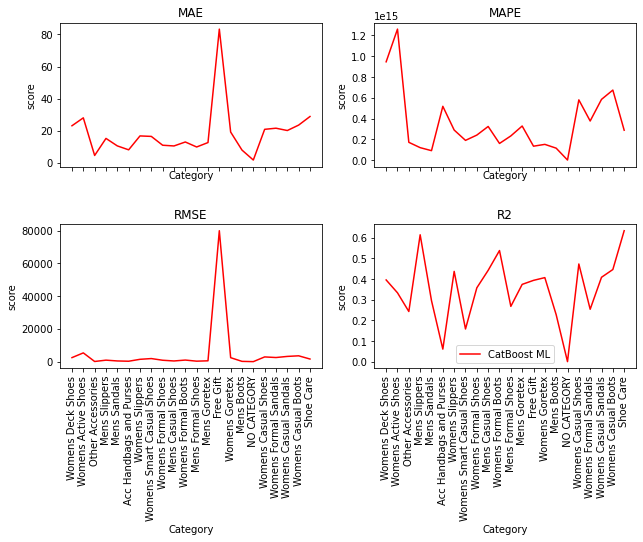

In [337]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))

axs[0, 0].plot(s_m3[:,0], s_m3[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[0, 0].set_title('MAE')
axs[0, 0].tick_params(labelbottom=False)
axs[0, 1].plot(s_m4[:,0], s_m4[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[0, 1].set_title('MAPE')
axs[0, 1].tick_params(labelbottom=False)
axs[1, 0].plot(s_m2[:,0], s_m2[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[1, 0].set_title('RMSE')
axs[1, 1].plot(s_m[:,0], s_m[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[1, 1].set_title('R2')
for ax in axs.flat:
    ax.set(xlabel='Category', ylabel='score')
    ax.tick_params(axis='x',labelrotation=90)
    #ax.set_xticklabels(ax.tick_params(), rotation = 90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
    
    



plt.legend()
plt.savefig('Images/scores.png',bbox_inches = "tight")

### EVALUATION for Womens Goretex

#### Model

In [338]:
df_ms = df_m[df_m['WSSI Category']=='Womens Goretex']

In [339]:
aggregation = {'sales':'sum',
               'Price':'mean',
               'y_hat_m':'sum'
                }

df_eval = df_ms[['y_hat_m','sales','Date','Price']].groupby('Date', as_index=False).agg(aggregation)
d_cat_g = df_eval

In [340]:
d_cat_g

,Date,sales,Price,y_hat_m
0,2017-01-08,735.0,62.054886,669.065010
1,2017-01-15,578.0,61.443456,667.776657
2,2017-01-22,837.0,65.511120,742.701134
3,2017-01-29,847.0,61.229283,841.358324
4,2017-02-05,1294.0,62.289896,984.243042
...,...,...,...,...
202,2020-11-29,207.0,54.605455,518.912858
203,2020-12-06,641.0,50.300990,787.777908
204,2020-12-13,1676.0,59.716483,573.775607
205,2020-12-20,518.0,63.255669,443.288992


In [341]:
y_test_m=d_cat_g['sales']
rovam = rova[rova['Date']<'2021-01-01']
rovam = rovam[['Model(Mixed Effects)|MULTMDV','Date']].groupby('Date', as_index=False).sum()
rovam

,Date,Model(Mixed Effects)|MULTMDV
0,2017-01-08,915.837105
1,2017-01-15,922.690909
2,2017-01-22,812.493501
3,2017-01-29,850.772343
4,2017-02-05,766.621923
...,...,...
202,2020-11-29,800.368444
203,2020-12-06,633.348100
204,2020-12-13,752.151520
205,2020-12-20,897.201496


In [342]:
from datetime import timedelta
df_eval = df_eval.merge(rovam, on='Date')
df_eval['Date'] = pd.to_datetime(df_eval['Date'], format='%y%m%d')
df_eval['Ndate'] = np.select( [(df_eval['Date']>='2019-01-01'),(df_eval['Date']<'2019-01-01')],[(df_eval['Date']-timedelta(days=7)).astype(str),(df_eval['Date']-timedelta(days=0)).astype(str)])
#df_eval['Ndate'] = df_eval['Observation']-timedelta(days=7)

df_eval['Ndate'] = pd.to_datetime(df_eval['Ndate'])
df_eval['Date'] = df_eval['Ndate']
print(df_eval.info())
df_eval['error_rova'] = df_eval['sales'] - df_eval['Model(Mixed Effects)|MULTMDV']
df_eval['error'] = df_eval['sales'] - df_eval['y_hat_m']
df_eval.mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          207 non-null    datetime64[ns]
 1   sales                         207 non-null    float64       
 2   Price                         207 non-null    float64       
 3   y_hat_m                       207 non-null    float64       
 4   Model(Mixed Effects)|MULTMDV  207 non-null    float64       
 5   Ndate                         207 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 11.3 KB
None


sales                           969.830918
Price                            52.217569
y_hat_m                         994.381537
Model(Mixed Effects)|MULTMDV    947.246432
error_rova                       22.584485
error                           -24.550619
dtype: float64

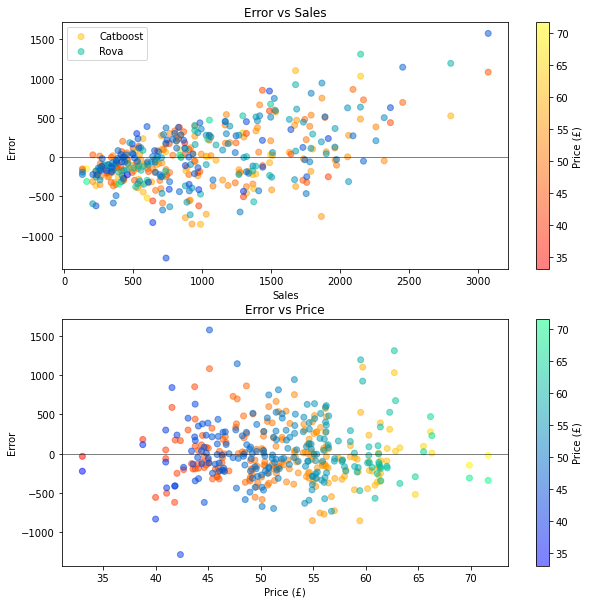

In [343]:
y2 = df_eval['error_rova']
x2 = df_eval['sales']
y = df_eval['error']
x = df_eval['Price']


plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Error vs Sales')
plt.axhline(y=0., color='black', linewidth=0.5)
plt.scatter(x2,y, c=x, cmap='autumn', alpha=0.5, label='Catboost')
plt.xlabel('Sales')
plt.ylabel('Error')
plt.colorbar(label='Price (£)')
plt.scatter(x2,y2, c=x, cmap='winter', alpha=0.5, label='Rova')
plt.legend()
plt.subplot(212)
plt.title('Error vs Price')
plt.axhline(y=0., color='black', linewidth=0.5)
plt.scatter(x,y, c=x, cmap='autumn', alpha=0.5)
plt.xlabel('Price (£)')
plt.ylabel('Error')
plt.scatter(x,y2, c=x, cmap='winter', alpha=0.5)
plt.colorbar(label='Price (£)')

plt.savefig('Images/ErrorModelGTX.png')
plt.show()

In [344]:
y_hat_rov=df_eval['Model(Mixed Effects)|MULTMDV']
y_test_m=df_eval['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)

print(score_rov,score2_rov,score3_rov,score4_rov)

0.5643373350054026 149113.16399760713 288.0223977772464 0.37595816327733445


In [345]:
y_hat_rov=df_eval['y_hat_m']
y_test_m=df_eval['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

0.661658609212028 115803.25638500831 262.2169703583163 0.3408895020312839


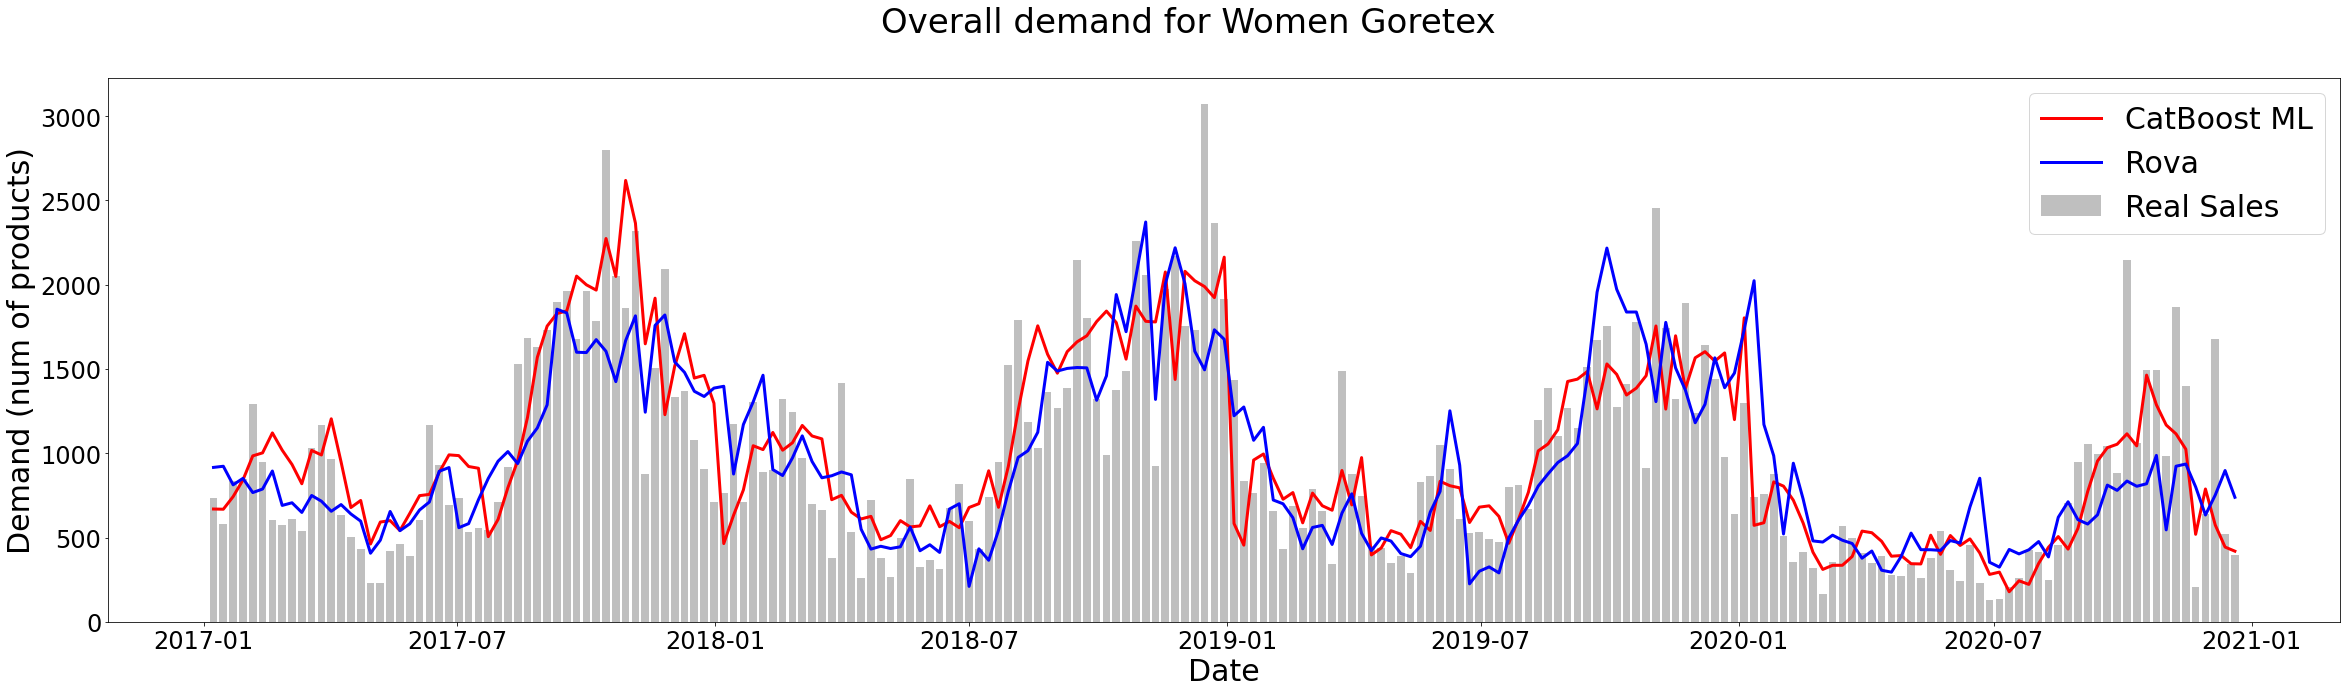

In [351]:
fig = plt.figure(figsize=(40,10))
fig.suptitle('Overall demand for Women Goretex', fontsize=34)
plt.plot(df_eval['Date'],df_eval['y_hat_m'],c='red',linewidth=3, label='CatBoost ML')
plt.bar(df_eval['Date'],df_eval['sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
plt.plot(df_eval['Date'],df_eval['Model(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
plt.ylabel('Demand (num of products)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=30)
plt.savefig('Images/Goretex_indiv.png')

#### Forecast

In [352]:
df_s = df[df['WSSI Category']=='Womens Goretex']

In [353]:
rova_f = rova[rova['Date']>='2021-01-01']
rovaf = rova_f[['Forecast(Mixed Effects)|MULTMDV','Date']].groupby('Date', as_index=False).sum()

In [354]:
aggregation = {'sales':'sum',
               'Price':'mean',
               'y_hat':'sum'
                }


df_eval_f = df_s[['y_hat','sales','Date','Price']].groupby('Date', as_index=False).agg(aggregation)
df_eval_f = df_eval_f.merge(rovaf, on='Date')


df_eval_f['error_rova'] = df_eval_f['sales'] - df_eval_f['Forecast(Mixed Effects)|MULTMDV']
df_eval_f['error'] = df_eval_f['sales'] - df_eval_f['y_hat']
df_eval_f

,Date,sales,Price,y_hat,Forecast(Mixed Effects)|MULTMDV,error_rova,error
0,2021-01-03,481.0,65.920737,539.188798,945.631120,-464.631120,-58.188798
1,2021-01-10,895.0,64.295247,347.018941,612.307017,282.692983,547.981059
2,2021-01-17,696.0,68.990352,315.374643,978.081965,-282.081965,380.625357
3,2021-01-24,445.0,74.851665,467.507701,937.810172,-492.810172,-22.507701
4,2021-01-31,555.0,73.048642,509.127864,874.968183,-319.968183,45.872136
5,2021-02-07,1254.0,68.909141,560.554584,935.368477,318.631523,693.445416
6,2021-02-14,810.0,69.274855,540.652381,809.097490,0.902510,269.347619
7,2021-02-21,792.0,72.714769,817.240353,736.216036,55.783964,-25.240353
8,2021-02-28,1275.0,63.099266,871.181784,681.916004,593.083996,403.818216
9,2021-03-07,1076.0,57.475195,877.625984,718.456809,357.543191,198.374016


In [355]:
y_hat_rov=df_eval_f['y_hat']
y_test_m=df_eval_f['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

y_hat_rov=df_eval_f['Forecast(Mixed Effects)|MULTMDV']
y_test_m=df_eval_f['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

df_eval_f.mean()

0.21281905705455506 249973.26764074422 342.5243821194429 0.3345175716532745
0.19261354265593955 256389.6303637606 393.99913286862756 0.47995831039781933


sales                              1034.901961
Price                                63.390041
y_hat                               861.394449
Forecast(Mixed Effects)|MULTMDV    1111.843409
error_rova                          -76.941448
error                               173.507512
dtype: float64

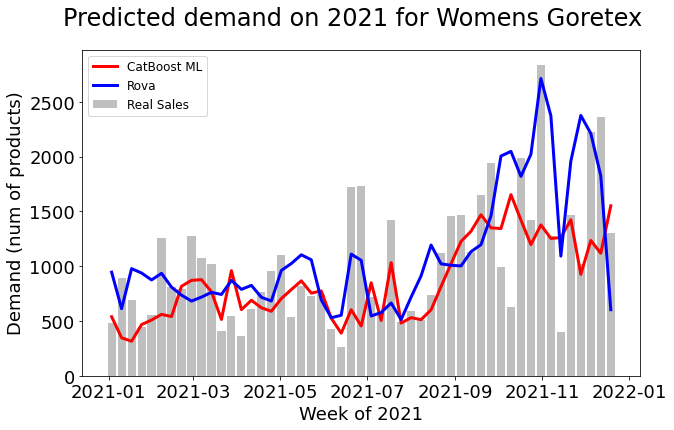

In [356]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Predicted demand on 2021 for Womens Goretex', fontsize=24)
plt.plot(df_eval_f['Date'],df_eval_f['y_hat'],c='red',linewidth=3, label='CatBoost ML')
plt.bar(df_eval_f['Date'],df_eval_f['sales'], color ='#bfbfbf', width = 5.7, label='Real Sales')
plt.plot(df_eval_f['Date'],df_eval_f['Forecast(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
plt.ylabel('Demand (num of products)', fontsize=18)
plt.xlabel('Week of 2021', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.savefig('Images/AllDemand2021Goretex_indiv.png')

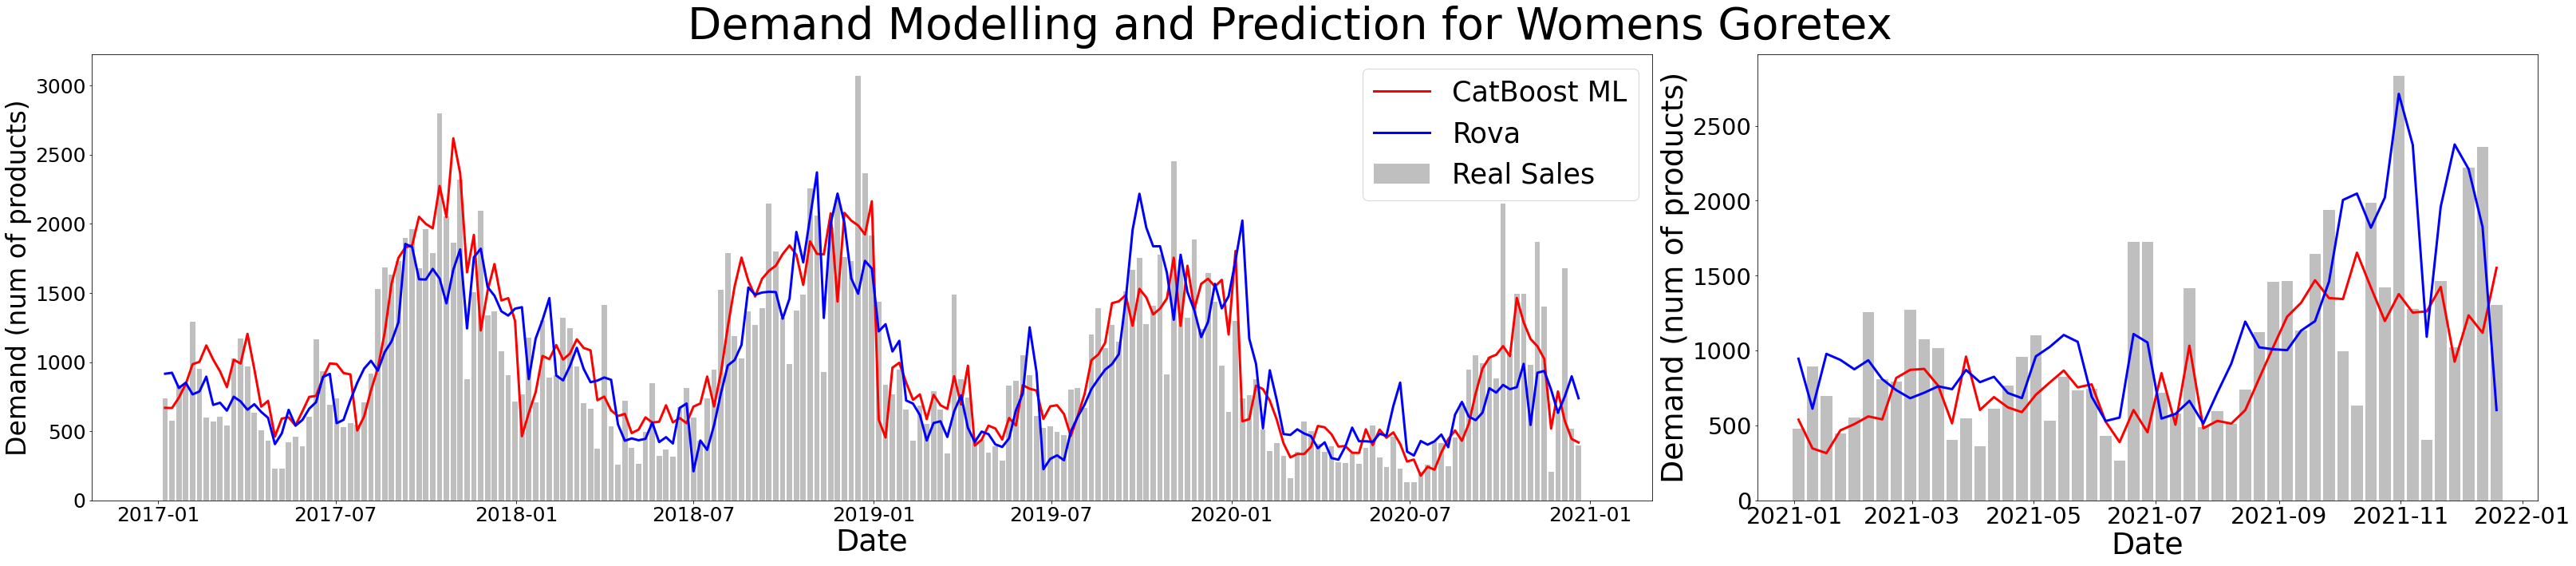

In [369]:
fig, ax = plt.subplots(1, 2,figsize=(45,10),gridspec_kw={'width_ratios': [6, 3]})

#ax[0].suptitle('Overall demand', fontsize=34)
ax[0].plot(df_eval['Date'],df_eval['y_hat_m'],c='red',linewidth=3, label='CatBoost ML')
ax[0].bar(df_eval['Date'],df_eval['sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
ax[0].plot(df_eval['Date'],df_eval['Model(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
ax[0].set_ylabel('Demand (num of products)', fontsize=33)
ax[0].set_xlabel('Date', fontsize=38)
ax[0].tick_params(axis='both', labelsize=25)
ax[0].legend(fontsize=35)

fig.suptitle('Demand Modelling and Prediction for Womens Goretex', fontsize=55)
ax[1].plot(df_eval_f['Date'],df_eval_f['y_hat'],c='red',linewidth=3, label='CatBoost ML')
ax[1].bar(df_eval_f['Date'],df_eval_f['sales'], color ='#bfbfbf', width = 5.7, label='Real Sales')
ax[1].plot(df_eval_f['Date'],df_eval_f['Forecast(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
ax[1].set_ylabel('Demand (num of products)', fontsize=38)
ax[1].set_xlabel('Date', fontsize=38)
ax[1].tick_params(axis='both', labelsize=29)
#ax[1].set_yticks(fontsize=24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.7)
plt.tight_layout()
plt.savefig('Images/rovacatb_pred.png')

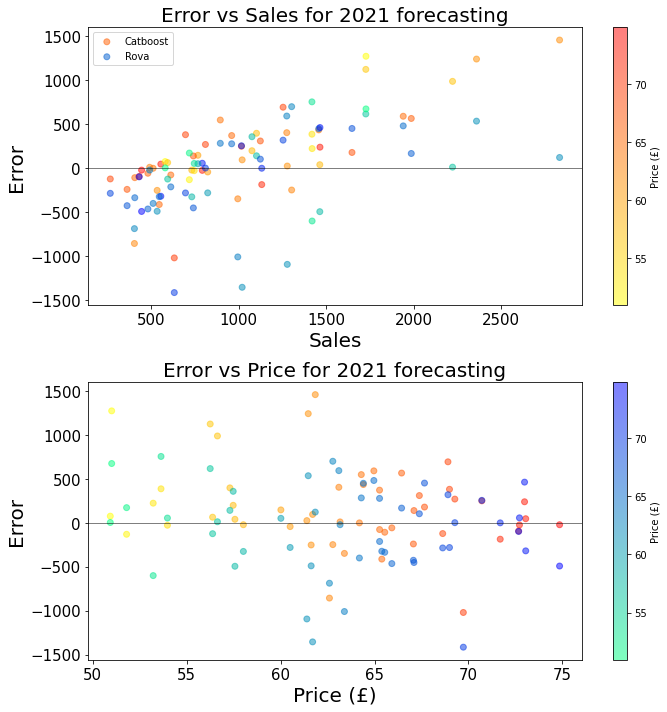

In [364]:
y2 = df_eval_f['error_rova']
x2 = df_eval_f['sales']
y = df_eval_f['error']
x = df_eval_f['Price']


plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Error vs Sales for 2021 forecasting', fontsize=20)
plt.axhline(y=0., color='black', linewidth=0.5)
plt.scatter(x2,y, c=x, cmap='autumn_r', alpha=0.5, label='Catboost')
plt.xlabel('Sales', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.tick_params('both', labelsize=15)
plt.colorbar(label='Price (£)')
plt.scatter(x2,y2, c=x, cmap='winter_r', alpha=0.5, label='Rova')
plt.legend()
plt.subplot(212)
plt.title('Error vs Price for 2021 forecasting', fontsize=20)
plt.axhline(y=0., color='black', linewidth=0.5)
plt.scatter(x,y, c=x, cmap='autumn_r', alpha=0.5)
plt.xlabel('Price (£)', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.scatter(x,y2, c=x, cmap='winter_r', alpha=0.5)
plt.colorbar(label='Price (£)')
plt.tick_params('both', labelsize=15)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
plt.tight_layout()
plt.savefig('Images/Error2021GTX.png')
plt.show()

### EVALUATION BY Product - Mist GTX, Ridge

#### Model

In [202]:
rova_r = rova[rova['Region']=='Ridge GTX']
rova_goretex = rova_r[['Model(Mixed Effects)|MULTMDV','Date']].groupby('Date', as_index=False).sum()
df_r = df_m[(df_m['Description']=='Ridge GTX')]
df_eval_goretex1 = df_r[['y_hat_m','sales','Date']].groupby('Date', as_index=False).sum()
df_eval_goretex1 = df_eval_goretex1.merge(rova_goretex, on='Date')

df_eval_goretex1['Ndate'] = np.select( [(df_eval_goretex1['Date']>='2019-01-01'),(df_eval_goretex1['Date']<'2019-01-01')],[(df_eval_goretex1['Date']-timedelta(days=7)).astype(str),(df_eval_goretex1['Date']-timedelta(days=0)).astype(str)])
#df_eval['Ndate'] = df_eval['Observation']-timedelta(days=7)

df_eval_goretex1['Ndate'] = pd.to_datetime(df_eval_goretex1['Ndate'])
df_eval_goretex1['Date'] = df_eval_goretex1['Ndate']
df_eval_goretex1.mean()

y_hat_m                         152.406697
sales                           172.350649
Model(Mixed Effects)|MULTMDV    171.558447
dtype: float64

In [203]:
rova_r2021 = rova_r[rova_r['Date']>='2021-01-01']
rova_goretex = rova_r2021[['Forecast(Mixed Effects)|MULTMDV','Date']].groupby('Date', as_index=False).sum()
df_gr = df[(df['Description']=='Ridge GTX')]
df_eval_goretex = df_gr[['y_hat','sales','Date']].groupby('Date', as_index=False).sum()
df_eval_goretex = df_eval_goretex.merge(rova_goretex, on='Date')
df_eval_goretex.mean()

y_hat                              176.279185
sales                              191.745098
Forecast(Mixed Effects)|MULTMDV    310.216218
dtype: float64

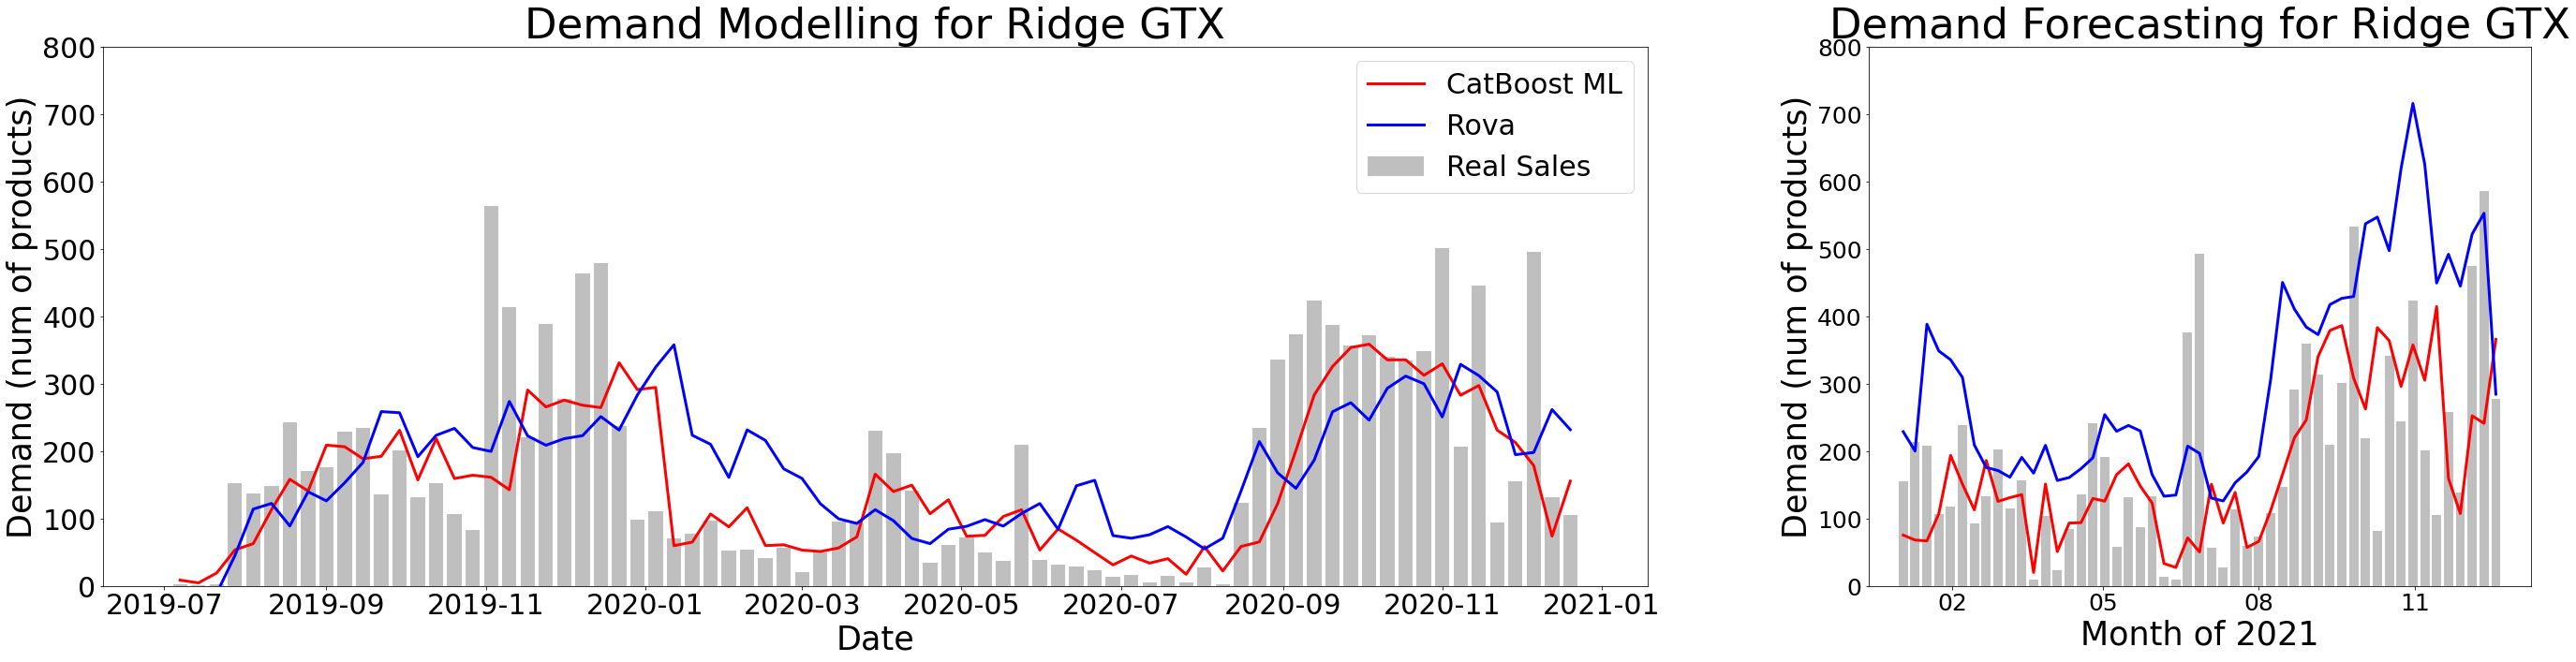

In [205]:
import matplotlib.dates as mdates
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(45,10),gridspec_kw={'width_ratios': [7, 3]})


ax1.set_title('Demand Modelling for Ridge GTX', fontsize=45)
ax1.plot(df_eval_goretex1['Date'],df_eval_goretex1['y_hat_m'],c='red',linewidth=3, label='CatBoost ML')
ax1.bar(df_eval_goretex1['Date'],df_eval_goretex1['sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
ax1.plot(df_eval_goretex1['Date'],df_eval_goretex1['Model(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
ax1.set_ylabel('Demand (num of products)', fontsize=35)
ax1.set_xlabel('Date', fontsize=35)
ax1.tick_params(axis='both', labelsize=30)
#ax1.yticks(fontsize=24)
ax1.legend(fontsize=30)
ax1.set_ylim(0,800)


ax2.set_title('Demand Forecasting for Ridge GTX', fontsize=45)
ax2.plot(df_eval_goretex['Date'],df_eval_goretex['y_hat'],c='red',linewidth=3, label='CatBoost ML')
ax2.bar(df_eval_goretex['Date'],df_eval_goretex['sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
ax2.plot(df_eval_goretex['Date'],df_eval_goretex['Forecast(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
ax2.set_ylabel('Demand (num of products)', fontsize=35)
ax2.set_xlabel('Month of 2021', fontsize=35)
ax2.tick_params(axis='both', labelsize=25)
ax2.set_ylim(0,800)
#ax2.set_xticks(np.arange(0, 13, 1.0))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))   #to get a tick every 15 minutes
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m')) 

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.7)

plt.savefig('Images/RidgeModel.png')

In [155]:
y_hat_rov=df_eval_goretex1['y_hat_m']
y_test_m=df_eval_goretex1['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

y_hat_rov=df_eval_goretex1['Model(Mixed Effects)|MULTMDV']
y_test_m=df_eval_goretex1['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

0.3085790599855246 34963.70031984889 132.85771911138352 0.3972430904610318
0.18981687623452836 40969.253755811835 146.51539893719806 0.4819002653702828


#### Forecast

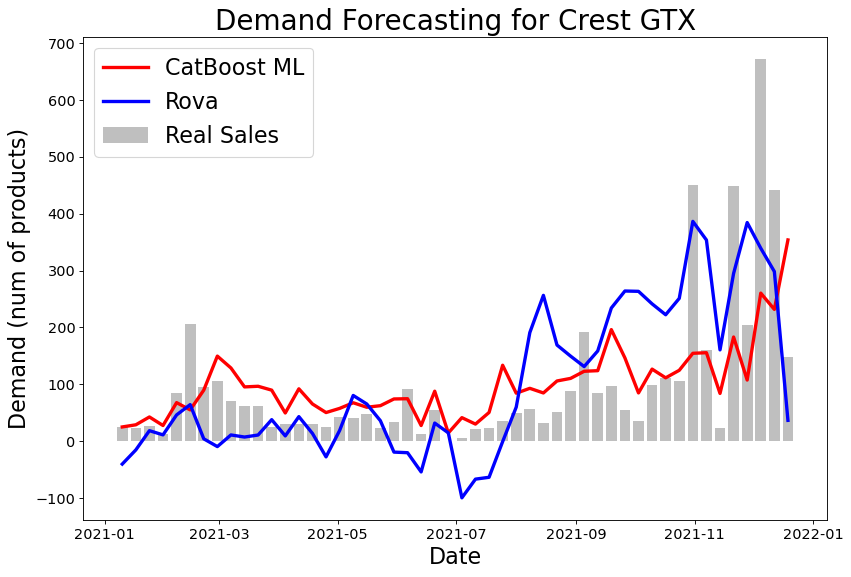

In [180]:
plt.figure(figsize=(12, 8), dpi=80)
plt.title('Demand Forecasting for Crest GTX', fontsize=25)
plt.plot(df_eval_goretex['Date'],df_eval_goretex['y_hat'],c='red',linewidth=3, label='CatBoost ML')
plt.bar(df_eval_goretex['Date'],df_eval_goretex['sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
plt.plot(df_eval_goretex['Date'],df_eval_goretex['Forecast(Mixed Effects)|MULTMDV'],c='blue',linewidth=3, label='Rova')
plt.ylabel('Demand (num of products)', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=20)
#plt.set_ylim(0,1600)
#ax2.set_xticks(range(,12))


plt.savefig('Images/CrestModel.png')

In [178]:
y_hat_rov=df_eval_goretex['y_hat']
y_test_m=df_eval_goretex['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

y_hat_rov=df_eval_goretex['Forecast(Mixed Effects)|MULTMDV']
y_test_m=df_eval_goretex['sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

0.3967929594585776 10466.739748924649 62.32372860498694 1.1790908065601882
0.2664220874446501 12728.911601205007 88.61155172199999 2.0905286127085985


### EVALUATION BY CATEGORY - Boots

#### Models

In [ ]:
rova_b = rova[(rova['gender']=='Womens')&(rova['style']=='Boots')]
rova_boots = rova_b[['Model(Sweep)|MULTMDV','Observation']].groupby('Observation', as_index=False).sum()
df_b = df_m[(df_m['gender']=='Womens')&(df_m['style']=='Boots')]
rova_b

In [ ]:
rova_boots.sort_values('Observation')

In [ ]:
df_eval_boots = df_b[['y_hat_m','Sales','Observation']].groupby('Observation', as_index=False).sum()
df_eval_boots = df_eval_boots.merge(rova_boots, on='Observation')
df_eval_boots['Ndate'] = np.select( [(df_eval_boots['Observation']>='2019-01-01'),(df_eval_boots['Observation']<'2019-01-01')],[(df_eval_boots['Observation']-timedelta(days=7)).astype(str),(df_eval_boots['Observation']-timedelta(days=0)).astype(str)])
#df_eval['Ndate'] = df_eval['Observation']-timedelta(days=7)

df_eval_boots['Ndate'] = pd.to_datetime(df_eval_boots['Ndate'])
df_eval_boots['Observation'] = df_eval_boots['Ndate']
df_eval_boots.mean()

In [ ]:
fig = plt.figure(figsize=(40,10))
fig.suptitle('Demand for Womens Boots Category', fontsize=30)
plt.plot(df_eval_boots['Observation'],df_eval_boots['y_hat_m'],c='red',linewidth=3, label='CatBoost ML')
plt.bar(df_eval_boots['Observation'],df_eval_boots['Sales'], color ='#bfbfbf', width = 5.5, label='Real Sales')
plt.plot(df_eval_boots['Observation'],df_eval_boots['Model(Sweep)|MULTMDV'],c='blue',linewidth=3, label='Rova')
plt.ylabel('Demand (num of products)', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=30)
plt.savefig('Images/Boots.png')

In [ ]:
y_hat_rov=df_eval_boots['y_hat_m']
y_test_m=df_eval_boots['Sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)
y_hat_rov=df_eval_boots['Model(Sweep)|MULTMDV']
y_test_m=df_eval_boots['Sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

#### Forecast

In [ ]:
rova_r2021 = rova[(rova['gender']=='Womens')&(rova['style']=='Boots')&(rova['Year']==2021)]
rova_boot = rova_r2021[['Forecast(Sweep)|MULTMDV','Week']].groupby('Week', as_index=False).sum()

In [ ]:
df_gr = df[(df['gender']=='Womens')&(df['style']=='Boots')]
df_eval_boots = df_gr[['y_hat','Sales','Week']].groupby('Week', as_index=False).sum()
df_eval_boots = df_eval_boots.merge(rova_boot, on='Week')
df_eval_boots.mean()

In [ ]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Demand for Womens Boots Categories', fontsize=24)
plt.plot(df_eval_boots['Week'],df_eval_boots['y_hat'],c='red',linewidth=3, label='CatBoost ML')
plt.bar(df_eval_boots['Week'],df_eval_boots['Sales'], color ='#bfbfbf', width = 0.5, label='Real Sales')
plt.plot(df_eval_boots['Week'],df_eval_boots['Forecast(Sweep)|MULTMDV'],c='blue',linewidth=3, label='Rova')
plt.ylabel('Demand (num of products)', fontsize=18)
plt.xlabel('Week of 2021', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.savefig('Images/Boots2021.png')

In [45]:
y_hat_rov=df_eval_boots['y_hat']
y_test_m=df_eval_boots['Sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)
y_hat_rov=df_eval_boots['Forecast(Sweep)|MULTMDV']
y_test_m=df_eval_boots['Sales']
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)
print(score_rov,score2_rov,score3_rov,score4_rov)

0.8275527500189377 2050769.354084569 1012.5253491181301 0.5474772039605775
-0.21700767328774817 14472843.378704855 2572.539287868 1.2871174443299733


In [46]:
df

,Description,Seasonality,Year,Channel,LIMITED EDITION STYLES,Hotter Originals,Source,NET DISCOUNT,MARKDOWN_U,RRP_U,...,prev_sales_week4,Week,boots,sandals,slippers,goretex,Sales,y_hat,error,Category
55487,"Dascomatic Bootshaper 14""",CONT,2021,Retail,0.0,0.0,SOURCED,0.000000,3.333333,10.833333,...,0.0,11,0.0,0.0,0.0,0.0,4.0,7.667996,-3.667996,Shoe Care
55488,"Dascomatic Bootshaper 14""",CONT,2021,Retail,0.0,0.0,SOURCED,0.000000,3.333333,10.833333,...,-4.0,12,0.0,0.0,0.0,0.0,3.0,7.667996,-4.667996,Shoe Care
55489,"Dascomatic Bootshaper 14""",CONT,2021,Retail,0.0,0.0,SOURCED,0.000000,3.333333,10.833333,...,-3.0,13,0.0,0.0,0.0,0.0,2.0,8.282681,-6.282681,Shoe Care
55490,"Dascomatic Bootshaper 14""",CONT,2021,Retail,0.0,0.0,SOURCED,0.000000,3.333333,10.833333,...,-2.0,14,0.0,0.0,0.0,0.0,2.0,7.735851,-5.735851,Shoe Care
55491,"Dascomatic Bootshaper 14""",CONT,2021,Retail,0.0,0.0,SOURCED,0.000000,3.333333,10.833333,...,17.0,15,0.0,0.0,0.0,0.0,4.0,7.413192,-3.413192,Shoe Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248480,Slide,CONT,2021,Wholesale,0.0,0.0,MANUFACTURED,1.350000,22.126666,49.166666,...,0.0,29,0.0,0.0,13.0,0.0,1.0,10.787554,-9.787554,Mens Slippers
248481,Slide,CONT,2021,Wholesale,0.0,0.0,MANUFACTURED,5.408333,22.126666,49.166666,...,-1.0,35,0.0,0.0,15.0,0.0,6.0,9.999357,-3.999357,Mens Slippers
248482,Slide,CONT,2021,Wholesale,0.0,0.0,MANUFACTURED,3.915000,22.126666,49.166666,...,-6.0,45,0.0,0.0,44.0,0.0,2.0,11.285684,-9.285684,Mens Slippers
248483,Slide,CONT,2021,Wholesale,0.0,0.0,MANUFACTURED,0.000000,22.126666,49.166666,...,-2.0,47,0.0,0.0,74.0,0.0,1.0,20.784560,-19.784560,Mens Slippers


In [47]:
rova_2021 = rova[(rova['Year']==2021)]
rova_full = rova_2021[['Forecast(Sweep)|MULTMDV','Week','Region']].groupby(['Week','Region'], as_index=False).sum()
rova_full['Category'] = rova_full['Region']
df_f = df[df['Year']==2021]
df_eval_full = df_f[['y_hat','Sales','Week','Category']].groupby(['Week','Category'], as_index=False).sum()
df_eval_full = df_eval_full.merge(rova_full, on=['Week','Category'])



scores_m = np.zeros((22))
scores2_m = np.zeros((22))
scores3_m = np.zeros((22))
scores4_m = np.zeros((22))
scores_mr = np.zeros((22))
scores2_mr = np.zeros((22))
scores3_mr = np.zeros((22))
scores4_mr = np.zeros((22))
j=0

for cat in df_eval_full['Category'].unique():
    df_eval_cat = df_eval_full[df_eval_full['Category']==cat]
    print(df_eval_cat.shape)
    
    scores_m[j] = r2_score(df_eval_cat['Sales'],df_eval_cat['y_hat'])
    scores2_m[j] = mean_squared_error(df_eval_cat['Sales'],df_eval_cat['y_hat'])
    scores3_m[j] = mean_absolute_error(df_eval_cat['Sales'],df_eval_cat['y_hat'])
    scores4_m[j] =mean_absolute_percentage_error(df_eval_cat['Sales'],df_eval_cat['y_hat'])
    
    scores_mr[j] = r2_score(df_eval_cat['Sales'],df_eval_cat['Forecast(Sweep)|MULTMDV'])
    scores2_mr[j] = mean_squared_error(df_eval_cat['Sales'],df_eval_cat['Forecast(Sweep)|MULTMDV'])
    scores3_mr[j] = mean_absolute_error(df_eval_cat['Sales'],df_eval_cat['Forecast(Sweep)|MULTMDV'])
    scores4_mr[j] =mean_absolute_percentage_error(df_eval_cat['Sales'],df_eval_cat['Forecast(Sweep)|MULTMDV'])
    
    

    s_m = np.array(list(zip(df_eval_full['Category'].unique(),scores_m)),dtype=object)
    s_m2 = np.array(list(zip(df_eval_full['Category'].unique(),scores2_m)),dtype=object)
    s_m3 = np.array(list(zip(df_eval_full['Category'].unique(),scores3_m)),dtype=object)
    s_m4 = np.array(list(zip(df_eval_full['Category'].unique(),scores4_m)),dtype=object)
    s_mr = np.array(list(zip(df_eval_full['Category'].unique(),scores_mr)),dtype=object)
    s_mr2 = np.array(list(zip(df_eval_full['Category'].unique(),scores2_mr)),dtype=object)
    s_mr3 = np.array(list(zip(df_eval_full['Category'].unique(),scores3_mr)),dtype=object)
    s_mr4 = np.array(list(zip(df_eval_full['Category'].unique(),scores4_mr)),dtype=object)
    
    j += 1
    
 

(50, 6)
(46, 6)
(45, 6)
(50, 6)
(50, 6)
(50, 6)
(40, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)
(50, 6)


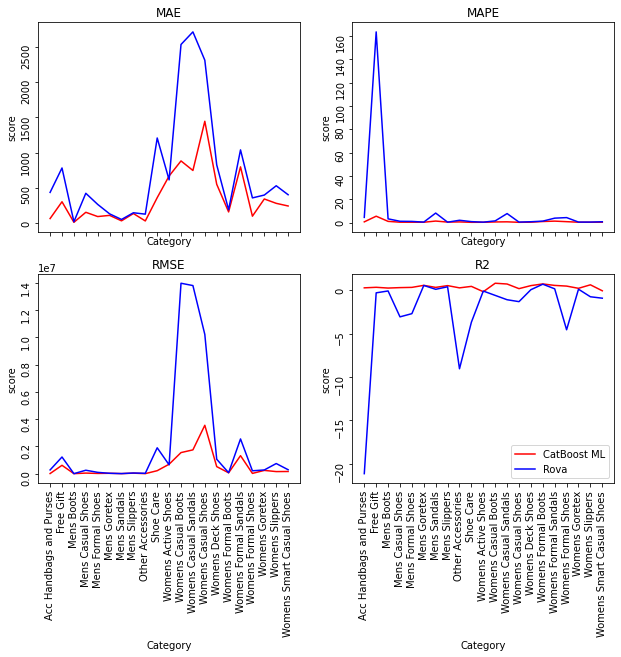

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

axs[0, 0].plot(s_m3[:,0], s_m3[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[0, 0].plot(s_mr3[:,0], s_mr3[:,1].astype(np.float64), c='blue', label= 'Rova')
axs[0, 0].set_title('MAE')
axs[0, 0].tick_params(labelbottom=False)
axs[0, 1].plot(s_m4[:,0], s_m4[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[0, 1].plot(s_mr4[:,0], s_mr4[:,1].astype(np.float64), c='blue', label= 'Rova')
axs[0, 1].set_title('MAPE')
axs[0, 1].tick_params(labelbottom=False)
axs[1, 0].plot(s_m2[:,0], s_m2[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[1, 0].plot(s_mr2[:,0], s_mr2[:,1].astype(np.float64), c='blue', label= 'Rova')
axs[1, 0].set_title('RMSE')
axs[1, 1].plot(s_m[:,0], s_m[:,1].astype(np.float64), c='red', label= 'CatBoost ML')
axs[1, 1].plot(s_mr[:,0], s_mr[:,1].astype(np.float64), c='blue', label= 'Rova')
axs[1, 1].set_title('R2')
for ax in axs.flat:
    ax.set(xlabel='Category', ylabel='score')
    ax.tick_params(labelrotation=90)
    plt.xticks(rotation=90)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
    
    



plt.legend()
plt.savefig('Images/scores.png',bbox_inches = "tight")

In [623]:
scores_m

array([0.23884436, 0.26687625, 0.14688233, 0.1852556 , 0.40617267,
       0.50793432, 0.42706139, 0.64211364, 0.58439865, 0.44043019,
       0.15682962, 0.80640881, 0.61917572, 0.1206189 , 0.56058161,
       0.744326  , 0.55167476, 0.41919927, 0.32782515, 0.60173002,
       0.0087028 , 0.        ])

In [624]:
score_rov = r2_score(y_test_m,y_hat_rov)
score2_rov = mean_squared_error(y_test_m,y_hat_rov)
score3_rov = mean_absolute_error(y_test_m,y_hat_rov)
score4_rov = mean_absolute_percentage_error(y_test_m,y_hat_rov)